* Importar Bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
# Importando os Dados MNIST
from tensorflow.keras.datasets import mnist
# Visualização dos dados
import matplotlib.pyplot as plt
import numpy as np

* Carregando os dados MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

* Preparando os Dados

In [ ]:
# Normalizando os dados (dividindo por 255 para que fiquem entre 0 e 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Convertendo os rótulos para uma representação categórica
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Redimensionando os dados de entrada
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

* Construindo o Modelo MLP

In [ ]:
# Construindo o Modelo MLP Usando Camadas Densas
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

* Treinando o Modelo

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8708 - loss: 0.4561 - val_accuracy: 0.9630 - val_loss: 0.1169
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9710 - loss: 0.0957 - val_accuracy: 0.9710 - val_loss: 0.0937
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9838 - loss: 0.0534 - val_accuracy: 0.9721 - val_loss: 0.0944
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9890 - loss: 0.0349 - val_accuracy: 0.9750 - val_loss: 0.0830
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9735 - val_loss: 0.0969
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9923 - loss: 0.0235 - val_accuracy: 0.9772 - val_loss: 0.0871
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9786 - val_loss: 0.0874
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9951 - loss: 0.0143 - val_

* Avaliando a previsão do Modelo de teste

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Precisão nos dados de teste: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.1231
Precisão nos dados de teste: 0.9755


* Fazendo previsões

In [ ]:
# Selecionar 10 amostras aleatórias do conjunto de teste
indices = np.random.choice(x_test.shape[0], 10, replace=False)
amostra_teste = x_test[indices]
rotulos_teste = y_test[indices]

In [ ]:
# Fazer previsões
previsoes = model.predict(amostra_teste)
classes_previstas = np.argmax(previsoes, axis=1)
classes_verdadeiras = np.argmax(rotulos_teste, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


* Calculando o acerto das previsões

In [ ]:
# Calcular o índice de acerto total
acuracia = np.sum(classes_previstas == classes_verdadeiras) / len(classes_verdadeiras)
print(f'Índice de acerto das previsões: {acuracia:.2%}')

Índice de acerto das previsões: 100.00%


* Visualizando os resultados

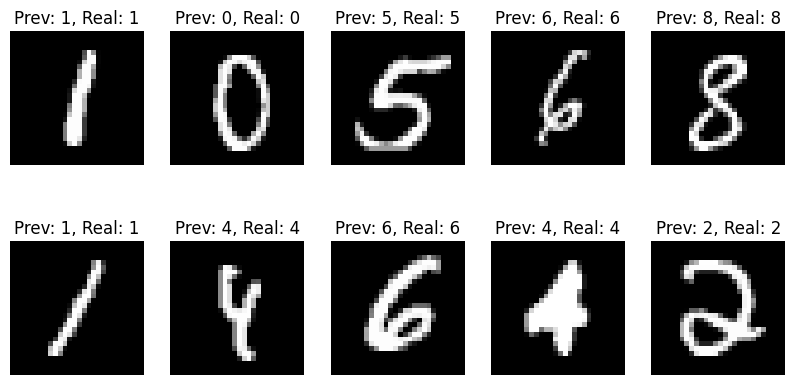

In [ ]:
# Visualizando os resultados
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(amostra_teste[i].reshape(28, 28), cmap='gray')
    plt.title(f'Prev: {classes_previstas[i]}, Real: {classes_verdadeiras[i]}')
    plt.axis('off')
plt.show()

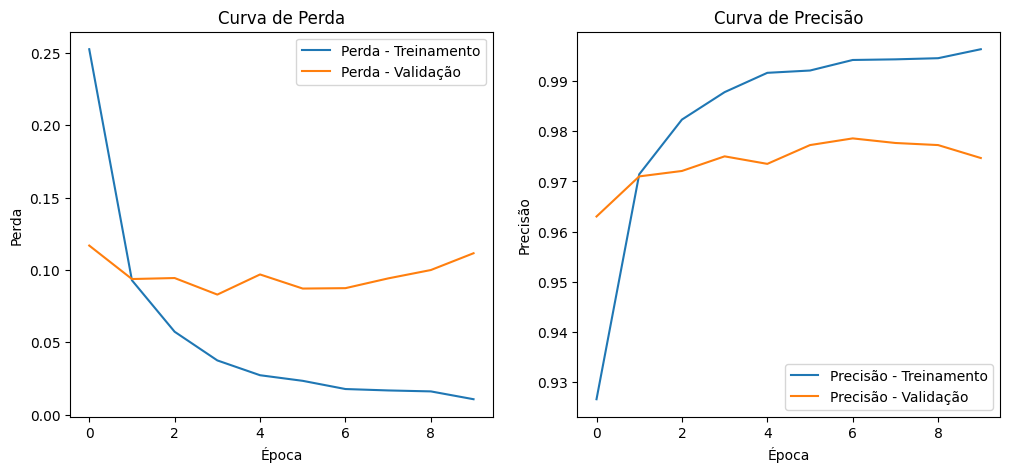

In [ ]:
# Plotar as curvas de perda e precisão para analisar o overfitting
plt.figure(figsize=(12, 5))

# Curva de perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda - Treinamento')
plt.plot(history.history['val_loss'], label='Perda - Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Curva de Perda')
plt.legend()

# Curva de precisão
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisão - Treinamento')
plt.plot(history.history['val_accuracy'], label='Precisão - Validação')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.title('Curva de Precisão')
plt.legend()

plt.show()
